# Assignment 4

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

This assignment requires that you to find **at least** two datasets on the web which are related, and that you visualize these datasets to answer a question with the broad topic of **sports or athletics** (see below) for the region of **Ann Arbor, Michigan, United States**, or **United States** more broadly.

You can merge these datasets with data from different regions if you like! For instance, you might want to compare **Ann Arbor, Michigan, United States** to Ann Arbor, USA. In that case at least one source file must be about **Ann Arbor, Michigan, United States**.

You are welcome to choose datasets at your discretion, but keep in mind **they will be shared with your peers**, so choose appropriate datasets. Sensitive, confidential, illicit, and proprietary materials are not good choices for datasets for this assignment. You are welcome to upload datasets of your own as well, and link to them using a third party repository such as github, bitbucket, pastebin, etc. Please be aware of the Coursera terms of service with respect to intellectual property.

Also, you are welcome to preserve data in its original language, but for the purposes of grading you should provide english translations. You are welcome to provide multiple visuals in different languages if you would like!

As this assignment is for the whole course, you must incorporate principles discussed in the first week, such as having as high data-ink ratio (Tufte) and aligning with Cairo’s principles of truth, beauty, function, and insight.

Here are the assignment instructions:

 * State the region and the domain category that your data sets are about (e.g., **Ann Arbor, Michigan, United States** and **sports or athletics**).
 * You must state a question about the domain category and region that you identified as being interesting.
 * You must provide at least two links to available datasets. These could be links to files such as CSV or Excel files, or links to websites which might have data in tabular form, such as Wikipedia pages.
 * You must upload an image which addresses the research question you stated. In addition to addressing the question, this visual should follow Cairo's principles of truthfulness, functionality, beauty, and insightfulness.
 * You must contribute a short (1-2 paragraph) written justification of how your visualization addresses your stated research question.

What do we mean by **sports or athletics**?  For this category we are interested in sporting events or athletics broadly, please feel free to creatively interpret the category when building your research question!

## Tips
* Wikipedia is an excellent source of data, and I strongly encourage you to explore it for new data sources.
* Many governments run open data initiatives at the city, region, and country levels, and these are wonderful resources for localized data sources.
* Several international agencies, such as the [United Nations](http://data.un.org/), the [World Bank](http://data.worldbank.org/), the [Global Open Data Index](http://index.okfn.org/place/) are other great places to look for data.
* This assignment requires you to convert and clean datafiles. Check out the discussion forums for tips on how to do this from various sources, and share your successes with your fellow students!

## Example
Looking for an example? Here's what our course assistant put together for the **Ann Arbor, MI, USA** area using **sports and athletics** as the topic. [Example Solution File](./readonly/Assignment4_example.pdf_football)

### Import Libraries

In [60]:
%matplotlib inline
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, RadioButtons, CheckButtons
import ipywidgets as widgets

### Data

This analysis compares the performance of the Big 4 sports teams of the University of Michigan Wolverines athletics program. The data was gathered from Wikipedia. 

Datasets used are listed below. \
Football: https://en.wikipedia.org/wiki/List_of_Michigan_Wolverines_football_seasons \
Baseball: https://en.wikipedia.org/wiki/List_of_Michigan_Wolverines_baseball_seasons \
Basketball: https://en.wikipedia.org/wiki/List_of_Michigan_Wolverines_men%27s_basketball_seasons \
Hockey: https://en.wikipedia.org/wiki/List_of_Michigan_Wolverines_men%27s_ice_hockey_seasons 

### Clean-Up

In [83]:
# generate data
url = "https://en.wikipedia.org/wiki/List_of_Michigan_Wolverines_football_seasons"
wiki = requests.get(url)
raw_data = pd.read_html(wiki.content, header=0)[0]

# clean up data and select for past 20 years (2000-2020)
df_football = pd.DataFrame(raw_data[142:166])
df_football = df_football.drop([150, 154, 159])

# create columns for wins, losses, total games played, and win percentage
df_football["Wins"] = df_football["Overall"].str.replace('\W\d{0,1}', '')
df_football["Losses"] = df_football["Overall"].str.replace('\D', '')
df_football["Losses"] = df_football["Losses"].str.strip().str[-1]
df_football["Wins"] = df_football["Wins"].astype(int)
df_football["Losses"] = df_football["Losses"].astype(int)
df_football["Total"] = df_football["Wins"] + df_football["Losses"]
df_football["W/L%"] = df_football["Wins"] / df_football["Total"]
df_football["Year"] = df_football["Year"].str.strip().str[2:4]
df_football["Year"] = "'" + df_football["Year"]
df_football['W/L%'] = df_football['W/L%'].round(3)
df_football

/Users/stevenmacauda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  # This is added back by InteractiveShellApp.init_path()
/Users/stevenmacauda/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: FutureWarning: The default value of regex will change from True to False in a future version.
  if sys.path[0] == '':


,Year,Coach,Overall,Conference,Standing,Bowl/playoffs,Coaches#,AP°,Unnamed: 8,Unnamed: 9,Wins,Losses,Total,W/L%
142,'00,Lloyd Carr,9–3,6–2,T–1st,W Florida Citrus,10,11,NaN,NaN,9,3,12,0.750
143,'01,Lloyd Carr,8–4,6–2,2nd,L Florida Citrus,20,20,NaN,NaN,8,4,12,0.667
144,'02,Lloyd Carr,10–3,6–2,3rd,W Outback,9,9,NaN,NaN,10,3,13,0.769
145,'03,Lloyd Carr,10–3,7–1,1st,L Rose†,7,6,NaN,NaN,10,3,13,0.769
146,'04,Lloyd Carr,9–3,7–1,T–1st,L Rose†,12,14,NaN,NaN,9,3,12,0.750
147,'05,Lloyd Carr,7–5,5–3,T–3rd,L Alamo,NaN,NaN,NaN,NaN,7,5,12,0.583
148,'06,Lloyd Carr,11–2,7–1,T–2nd,L Rose†,9,8,NaN,NaN,11,2,13,0.846
149,'07,Lloyd Carr,9–4,6–2,T–2nd,W Capital One,19,18,NaN,NaN,9,4,13,0.692
151,'08,Rich Rodriguez,3–9,2–6,10th,NaN,NaN,NaN,NaN,NaN,3,9,12,0.250
152,'09,Rich Rodriguez,5–7,1–7,T–10th,NaN,NaN,NaN,NaN,NaN,5,7,12,0.417


In [84]:
# generate data
url = "https://en.wikipedia.org/wiki/List_of_Michigan_Wolverines_baseball_seasons"
wiki = requests.get(url)
raw_data = pd.read_html(wiki.content, header=0)[1]
df_baseball = pd.DataFrame(raw_data[137:158])
df_baseball = df_baseball.rename(columns={'Season results': 'Wins', 'Season results.1': 'Losses', 'Season results.2': 'Ties', 'Season results.3': 'W/L%'})
df_baseball['Season'] = df_baseball['Season'].str.strip().str[2:4]
df_baseball['Season'] = "'" + df_baseball['Season']
df_baseball['W/L%'] = df_baseball['W/L%'].astype(float)
df_baseball

,Season,Head coach,Conference,Wins,Losses,Ties,W/L%,Season results.4,Season results.5,Season results.6,Season results.7,Season results.8,Tournament results,Tournament results.1,Final Poll[A 1],Final Poll[A 1].1,Final Poll[A 1].2,Unnamed: 17
137,'00,Geoff Zahn,Big Ten,20,32,1,0.387,10,18,0,.357,8th,—,—,—,—,—,NaN
138,'01,Geoff Zahn,Big Ten,28,28,0,0.500,10,14,0,.417,6th,Finals,—,—,—,—,NaN
139,'02,Chris Harrison,Big Ten,21,32,0,0.396,14,17,0,.452,8th,—,—,—,—,—,NaN
140,'03,Rich Maloney,Big Ten,30,27,0,0.526,16,14,0,.533,3rd,Third Round,—,—,—,—,NaN
141,'04,Rich Maloney,Big Ten,34,26,0,0.567,19,13,0,.594,T-3rd,Semifinals,—,—,—,—,NaN
142,'05,Rich Maloney,Big Ten,42,19,0,0.689,17,12,0,.586,T-4th,Second Round,Atlanta Regional,—,—,—,NaN
143,'06,Rich Maloney,Big Ten,43,21,0,0.672,23,9,0,.719,1st,1st,Atlanta Regional,—,—,—,NaN
144,'07,Rich Maloney,Big Ten,42,19,0,0.689,21,7,0,.750,1st,Second Round,Corvallis Super Regional,—,—,—,NaN
145,'08,Rich Maloney,Big Ten,46,14,0,0.767,26,5,0,.839,1st,1st,Ann Arbor Regional,22,20,22,NaN
146,'09,Rich Maloney,Big Ten,30,25,0,0.545,9,15,0,.375,7th,—,—,—,—,—,NaN


In [85]:
# generate data
url = 'https://en.wikipedia.org/wiki/List_of_Michigan_Wolverines_men%27s_basketball_seasons'
wiki = requests.get(url)
raw_data = pd.read_html(wiki.content, header=0)[0]
df_basketball = pd.DataFrame(raw_data[98:122])

# drop unnecessary rows and format data
df_basketball = df_basketball.drop([99, 106, 119])
df_basketball['Season'] = df_basketball['Season'].str.strip().str[2:4]
df_basketball['Season'] = "'" + df_basketball['Season']
df_basketball['Wins'] = df_basketball['Overall'].str.strip().str[0:2]
df_basketball['Losses'] = df_basketball['Overall'].str.strip().str[3:5]
df_basketball["Wins"] = df_basketball["Wins"].astype(int)
df_basketball["Losses"] = df_basketball["Losses"].astype(int)
df_basketball['Total'] = df_basketball['Wins'] + df_basketball['Losses']
df_basketball['W/L%'] = df_basketball['Wins'] / df_basketball['Total']
df_basketball['W/L%'] = df_basketball['W/L%'].round(3)
df_basketball

,Season,Coach,Overall,Conference,Standing,Postseason,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Wins,Losses,Total,W/L%
98,'00,Brian Ellerbe,10–18,4–12,9th,NaN,NaN,NaN,NaN,NaN,10,18,28,0.357
100,'01,Tommy Amaker,11–18,5–11,T–8th,NaN,NaN,NaN,NaN,NaN,11,18,29,0.379
101,'02,Tommy Amaker,17–13,10–6,T–3rd,NaN,NaN,NaN,NaN,NaN,17,13,30,0.567
102,'03,Tommy Amaker,23–11,8–8,T–5th,NIT Champion,NaN,NaN,NaN,NaN,23,11,34,0.676
103,'04,Tommy Amaker,13–18,4–12,9th,NaN,NaN,NaN,NaN,NaN,13,18,31,0.419
104,'05,Tommy Amaker,22–11,8–8,T–6th,NIT Runner-up,NaN,NaN,NaN,NaN,22,11,33,0.667
105,'06,Tommy Amaker,22–13,8–8,T–7th,NIT Second Round,NaN,NaN,NaN,NaN,22,13,35,0.629
107,'07,John Beilein,10–22,5–13,T–9th,NaN,NaN,NaN,NaN,NaN,10,22,32,0.312
108,'08,John Beilein,21–14,9–9,T–7th,NCAA Second Round,NaN,NaN,NaN,NaN,21,14,35,0.600
109,'09,John Beilein,15–17,7–11,T–7th,NaN,NaN,NaN,NaN,NaN,15,17,32,0.469


In [86]:
url = 'https://en.wikipedia.org/wiki/List_of_Michigan_Wolverines_men%27s_ice_hockey_seasons'
wiki = requests.get(url)
raw_data = pd.read_html(wiki.content, header=0)[1]
df_hockey = pd.DataFrame(raw_data[111:133])
df_hockey = df_hockey.drop(128)
df_hockey = df_hockey.rename(columns={'Regular Season[a].7': 'Games Played', 'Regular Season[a].8': 'Wins', 'Regular Season[a].9': 'Losses', 
                                      'Regular Season[a].10': 'Ties', 'Regular Season[a].11': 'W/L%'})
df_hockey['Season'] = df_hockey['Season'].str.strip().str[2:4]
df_hockey['Season'] = "'" + df_hockey['Season']
df_hockey['W/L%'] = df_hockey['W/L%'].astype(float)
df_hockey

,Season,Conference,Regular Season[a],Regular Season[a].1,Regular Season[a].2,Regular Season[a].3,Regular Season[a].4,Regular Season[a].5,Regular Season[a].6,Games Played,Wins,Losses,Ties,W/L%,Conference Tournament Results,National Tournament Results
111,'00,CCHA,28,16,9,3,–,35,3rd,45,27,13,5,0.656,"Won First Round series, 2–0 (Ferris State)Won ...","Won Regional Quarterfinal, 4–3 (Mercyhurst)Won..."
112,'01,CCHA,28,19,5,4,–,42,1st,44,28,11,5,0.693,"Won First Round series, 2–1 (Lake Superior Sta...","Won Regional Quarterfinal, 4–2 (St. Cloud Stat..."
113,'02,CCHA,28,18,7,3,–,39,2nd,43,30,10,3,0.733,"Won First Round series, 2–1 (Lake Superior Sta...","Won Regional Semifinal, 2–1 (Maine)Won Regiona..."
114,'03,CCHA,28,18,8,2,–,38,1st,43,27,14,2,0.651,"Won First Round series, 2–1 (Nebraska–Omaha)Wo...","Won Regional Semifinal, 4–1 (New Hampshire)Los..."
115,'04,CCHA,28,23,3,2,–,48,1st,42,31,8,3,0.774,"Won First Round series, 2–0 (Notre Dame)Won Se...","Won Regional Semifinal, 4–1 (Wisconsin)Lost Re..."
116,'05,CCHA,28,13,10,5,–,31,3rd,41,21,15,5,0.573,"Won Quarterfinal series, 2–0 (Ferris State)Los...","Lost Regional Semifinal, 1–5 (North Dakota)"
117,'06,CCHA,28,18,9,1,–,37,2nd,41,26,14,1,0.646,"Won Quarterfinal series, 2–0 (Northern Michiga...","Lost Regional Semifinal, 5–8 (North Dakota)"
118,'07,CCHA,28,20,4,4,–,44,1st,43,33,6,4,0.814,"Won Quarterfinal series, 2–0 (Nebraska–Omaha)W...","Won Regional Semifinal, 4–1 (Niagara)Won Regio..."
119,'08,CCHA,28,20,8,0,0,40,T–2nd,41,29,12,0,0.707,"Won Quarterfinal series, 2–0 (Western Michigan...","Lost Regional Semifinal, 0–2 (Air Force)"
120,'09,CCHA,28,14,13,1,0,43,7th,45,26,18,1,0.589,"Won First Round series, 2–0 (Lake Superior Sta...","Won Regional Semifinal, 5–1 (Bemidji State)Los..."


### Plotting


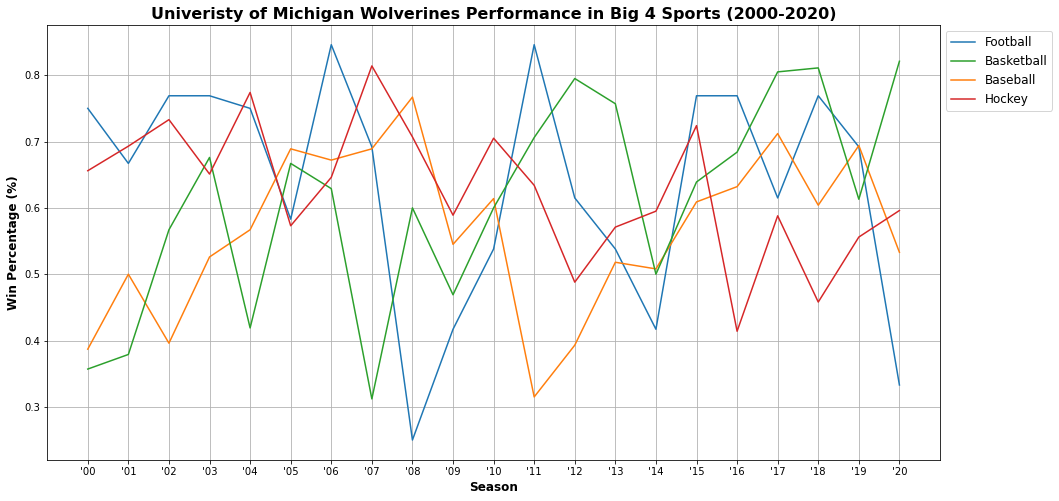

In [87]:
fig, ax = plt.subplots(sharex=True,sharey=True, figsize=(16,8))
football,=ax.plot(df_football['Year'], df_football['W/L%'])
baseball,=ax.plot(df_baseball['Season'], df_baseball['W/L%'])
basketball,=ax.plot(df_basketball['Season'], df_basketball['W/L%'])
hockey,=ax.plot(df_hockey['Season'], df_hockey['W/L%'])
ax.grid(True)
ax.legend([football, basketball, baseball, hockey], 
          ['Football', 'Basketball', 'Baseball', 'Hockey'],bbox_to_anchor=(1, 1), 
          loc='upper left', ncol=1, fontsize=12)
plt.xlabel('Season', fontweight='bold', fontsize=12)
plt.ylabel('Win Percentage (%)', fontweight='bold', fontsize=12)
plt.title('Univeristy of Michigan Wolverines Performance in Big 4 Sports (2000-2020)', 
          fontweight='bold', fontsize=16)
plt.show()
plt.ion()
fig.savefig('UMichSports.jpg')

### Interactivity

<IPython.core.display.Javascript object>


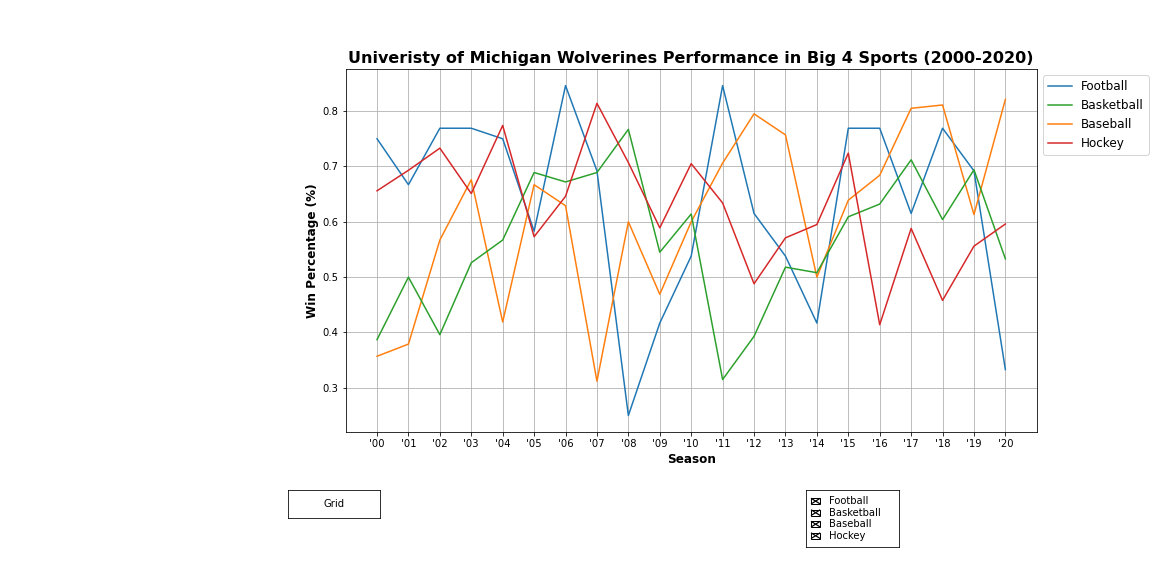

In [88]:
# NOTE: must use Jupyter Notebook (tested w/ version 6.3.0) for this feature. It will fail in JupyterLab. 

%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Button, CheckButtons

#x = df_football['Year']
#y = df_football['W/L%']

fig = plt.figure(figsize=(16,8))
ax = fig.subplots()
plt.title("Univeristy of Michigan Wolverines Performance in Big 4 Sports (2000-2020)", 
          fontweight='bold', fontsize=16)
plt.xlabel("Season", fontweight='bold', fontsize=12)
plt.ylabel("Win Percentage (%)", fontweight='bold', fontsize=12)
ax.legend([football, basketball, baseball, hockey], 
          ['Football', 'Basketball', 'Baseball', 'Hockey'],bbox_to_anchor=(1, 1), 
          loc='upper left', ncol=1, fontsize=12)
plt.subplots_adjust(left = 0.3, bottom = 0.25)
#p, = ax.plot(x, y, color = 'b', label = 'football')
ax_button = plt.axes([0.25, 0.1, 0.08, 0.05])
grid_button = Button(ax_button, 'Grid', color='white', hovercolor='grey')
def grid(val):
    ax.grid()
    fig.canvas.draw()
grid_button.on_clicked(grid)


p1, = ax.plot(df_football['Year'], df_football['W/L%'], label = 'Football', visible = False)
p3, = ax.plot(df_football['Year'], df_basketball['W/L%'], label = 'Basketball', visible = False)
p2, = ax.plot(df_football['Year'], df_baseball['W/L%'], label = 'Baseball', visible = False)
p4, = ax.plot(df_football['Year'], df_hockey['W/L%'], label = 'Hockey', visible = False)
plots =[p1, p2, p3, p4]
activated = [False, False, False, False]
labels = ['Football', 'Basketball', 'Baseball', 'Hockey']
# instance the axes
ax_check = plt.axes([0.7, 0.05, 0.08, 0.1])
plot_button = CheckButtons(ax_check,labels, activated)

def select_plot(label):
    
    # get the index that corresponds to the word "label"
    index = labels.index(label)
    
    # set the plot to visible
    plots[index].set_visible(not plots[index].get_visible())
    fig.canvas.draw()
plot_button.on_clicked(select_plot)
plt.show()